In [39]:
#!pip install pandas
#!pip install seaborn

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
letterbox_path = "outside_data/final_letterboxd_clean.csv"
tomatoes_path = "outside_data/rotten_tomatoes_critic_reviews.csv"

letterbox_data = pd.read_csv(letterbox_path)
letterbox_data.columns

Index(['movie_name', 'Release Year', 'Reviewer name', 'Clean_Review_date',
       'Clean_Review', 'Clean_Comment Count', 'Like count', 'genre'],
      dtype='object')

In [7]:
letterbox_data

,movie_name,Release Year,Reviewer name,Clean_Review_date,Clean_Review,Clean_Comment Count,Like count,genre
0,Clue,1985,Branson Reese,1996-10-16,My dad got in so much trouble for showing me t...,6,"2,286 likes",Comedy
1,Beetlejuice,1988,Branson Reese,1999-10-21,Thank GOD Tim Burton made this movie in 1988 a...,12,"3,304 likes",Comedy
2,Being John Malkovich,1999,Than Tibbetts,2010-10-04,"Malkovich. Malkovich Malkovich Malkovich, Malk...",6,"4,300 likes",Comedy
3,The Muppets,2011,Jeff,2012-03-06,"It's fine if you don't like this movie, but it...",31,NaN,Comedy
4,Mysterious Skin,2004,Cole,2012-03-11,"This movie is beautiful, captivating, fascinat...",4,6 23 likes,Drama
...,...,...,...,...,...,...,...,...
2832,Drive,2011,k??rsten,NaN,"Yes, I just saw it for the first timeYes, I lo...",9,"2,160 likes",Action
2833,Fight Club,1999,hunt??r,NaN,"if I was next to brad, I would have dropped th...",19,NaN,Drama
2834,The Bling Ring,2013,k??rsten,NaN,not a single good shot or outfit in this entir...,30,NaN,Crime
2835,A Serbian Film,2010,DirkH,NaN,"OH MY GOD, LOOK AT HOW CONTROVERSIAL I AM!!!!!!",65,NaN,Horror


In [9]:
letterbox_data = letterbox_data.drop(columns="Reviewer name")

In [12]:
letterbox_data.isnull().sum()

movie_name               0
Release Year             0
Clean_Review_date      136
Clean_Review             0
Clean_Comment Count    219
Like count             775
genre                    0
dtype: int64

We can check which movies have the missing year and add the year the movie came out or a random year in a span of 5 years.
Even though I am not sure how important the year would be for our case so we might as well drop it too.

Not really sure what `Clean_Comment Count` is but since we already have a like count, might as well drop it

I think the `Likes` would be a good addition, can add more to the review when we do analysis to it. 
For what I see the `Likes` translate to people who liked the review, does not mean that the movie is god or bad.
As an idea, we could check the movies that have the most amount of likes as see what kind of review it is with sentiment analysis.
Maybe the movie was so horrible that everyone agreed with it, and viceversa.

In [14]:
letterbox_data["Like count"]

0         2,286 likes
1         3,304 likes
2         4,300 likes
3                 NaN
4         6  23 likes
            ...      
2832      2,160 likes
2833              NaN
2834              NaN
2835              NaN
2836              NaN
Name: Like count, Length: 2837, dtype: object

In [23]:
def clean_like_counts(col):
    col = col.astype(str).str.replace(r"[^\d]", "", regex=True)  # Remove non-numeric characters
    col = pd.to_numeric(col, errors='coerce')  # Convert to numeric, setting errors to NaN
    return col

letterbox_data["Like count"] = clean_like_counts(letterbox_data["Like count"])
letterbox_data["Like count"] = letterbox_data["Like count"].astype('Int64')
letterbox_data["Like count"]

0       22860
1       33040
2       43000
3        <NA>
4        6230
        ...  
2832    21600
2833     <NA>
2834     <NA>
2835     <NA>
2836     <NA>
Name: Like count, Length: 2837, dtype: Int64

Decided to turn the column `Like count` into integer so that it is easy to work with

In [27]:
max_like_count = letterbox_data[letterbox_data['Like count'] == letterbox_data['Like count'].max()]
min_like_count = letterbox_data[letterbox_data['Like count'] == letterbox_data['Like count'].min()]

max_min_likes = pd.concat([max_like_count, min_like_count])
max_min_likes

,movie_name,Release Year,Clean_Review_date,Clean_Review,Clean_Comment Count,Like count,genre
655,Aftersun,2022,2020-01-12,This review may contain spoilers.,130,224460,Drama
1123,Shang-Chi and the Legend of the Ten Rings,2021,2021-09-03,Another Marvel movie that would be twice as go...,6,10,Action


In [29]:
letterbox_data = letterbox_data.drop(columns=["Clean_Comment Count", "Clean_Review_date"])
letterbox_data

,movie_name,Release Year,Clean_Review,Like count,genre
0,Clue,1985,My dad got in so much trouble for showing me t...,22860,Comedy
1,Beetlejuice,1988,Thank GOD Tim Burton made this movie in 1988 a...,33040,Comedy
2,Being John Malkovich,1999,"Malkovich. Malkovich Malkovich Malkovich, Malk...",43000,Comedy
3,The Muppets,2011,"It's fine if you don't like this movie, but it...",<NA>,Comedy
4,Mysterious Skin,2004,"This movie is beautiful, captivating, fascinat...",6230,Drama
...,...,...,...,...,...
2832,Drive,2011,"Yes, I just saw it for the first timeYes, I lo...",21600,Action
2833,Fight Club,1999,"if I was next to brad, I would have dropped th...",<NA>,Drama
2834,The Bling Ring,2013,not a single good shot or outfit in this entir...,<NA>,Crime
2835,A Serbian Film,2010,"OH MY GOD, LOOK AT HOW CONTROVERSIAL I AM!!!!!!",<NA>,Horror


In [31]:
summary_stats = letterbox_data.describe()
summary_stats

,Release Year,Like count
count,2837.000000,2062.0
mean,2013.238280,37284.752667
std,13.283033,32461.824025
min,1902.000000,10.0
25%,2008.000000,22080.0
50%,2020.000000,26670.0
75%,2022.000000,42350.0
max,2023.000000,224460.0


In [32]:
# Count of movies per genre
genre_counts = letterbox_data["genre"].value_counts()
genre_counts

genre
Drama          726
Horror         326
Comedy         317
Action         283
Sci-Fi         218
Animation      214
Romance        211
Thriller       125
Mystery        118
Crime           84
Fantasy         67
Musical         65
Adventure       22
Documentary     20
Maverick        16
War             13
Biography        7
Western          4
Family           1
Name: count, dtype: int64

In [35]:
# Distribution of reviews over the years
release_year_counts = letterbox_data["Release Year"].value_counts()
release_year_counts

Release Year
2022    761
2021    475
2019    176
2020    166
2018     88
2014     86
1999     71
2004     63
2009     62
2016     62
2010     58
2001     57
2013     56
2023     46
2006     42
2000     42
2005     41
2003     38
2015     37
2008     32
2012     31
1995     26
1989     25
2002     25
1996     23
1986     23
2011     23
1994     22
1985     17
1998     16
1991     14
1993     14
1988     13
1992     12
1990     11
1980      9
1983      9
1982      8
1984      6
1960      5
1968      5
1981      4
1941      4
1902      3
1954      3
1929      3
1946      3
1961      3
1966      3
1942      2
1952      2
1965      2
1939      2
1958      1
1964      1
1948      1
1962      1
1959      1
1963      1
1922      1
Name: count, dtype: int64

/var/folders/6f/_m3vtyy92m94t_l4qyl157240000gn/T/ipykernel_3200/446317636.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


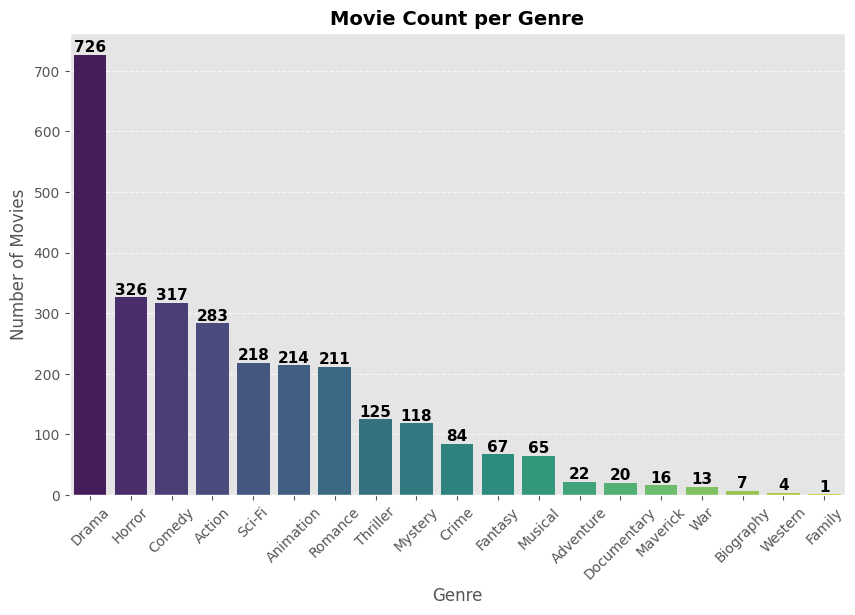

In [44]:
plt.style.use("ggplot")

# Improved plot: Movie count per genre
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.xlabel("Genre", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.title("Movie Count per Genre", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#  legend
for i, p in enumerate(ax.patches):
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.show()

/var/folders/6f/_m3vtyy92m94t_l4qyl157240000gn/T/ipykernel_3200/1723709604.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=release_year_counts.index, y=release_year_counts.values, palette="magma")


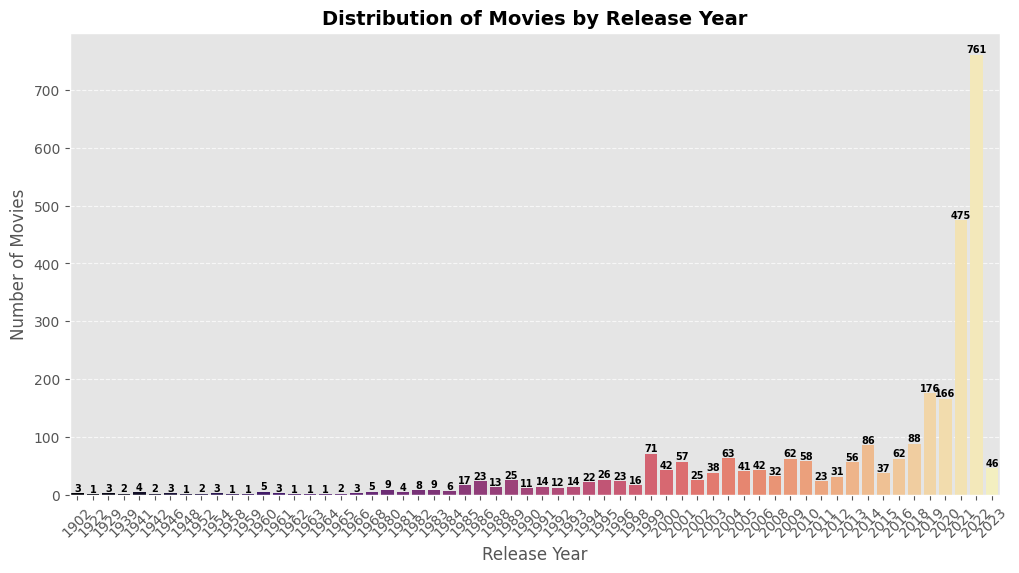

In [47]:
# Improved plot: Distribution of movies by release year
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=release_year_counts.index, y=release_year_counts.values, palette="magma")
plt.xlabel("Release Year", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.title("Distribution of Movies by Release Year", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# legend
for i, p in enumerate(ax.patches):
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=7, fontweight='bold')
plt.show()